In [11]:
# Nikolaos Stergioulas, Aristotle University of Thessaloniki 
#
# Content provided under a Creative Commons Attribution license, CC BY-NC-SA 4.0; code under GNU GPLv3 License. 
# (c)2024 Nikolaos Stergioulas   

import subprocess
import os
import time
import matplotlib.pyplot as plt
import numpy as np

# List of number of threads
num_threads_list = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]

# Number of random trials

N = 10000000000 

# List to store execution times
execution_times = []
output_list = []

for num_threads in num_threads_list:
    # Set the OMP_NUM_THREADS environment variable
    #os.environ["OMP_NUM_THREADS"] = str(num_threads)
    os.environ["JULIA_NUM_THREADS"] = str(num_threads)

    # Run the Julia code and capture the output
    start_time = time.time()
    output = subprocess.check_output(["/home/niksterg/julia-1.8.1/bin/julia", "-t", str(32), "pi_mc.jl", "-p", str(num_threads), "-n", str(N)], universal_newlines=True)

    # Append the output to the list
    output_list.append(output)
    print(output)

    end_time = time.time()

    # Calculate and store the execution time
    execution_time = end_time - start_time
    execution_times.append(execution_time)


Pi estimate = 3.1416317804

Pi estimate = 3.141609946

Pi estimate = 3.1415925284

Pi estimate = 3.1416059776

Pi estimate = 3.141590746

Pi estimate = 3.1415852184

Pi estimate = 3.1415975408

Pi estimate = 3.141576108

Pi estimate = 3.1415915628

Pi estimate = 3.1415999112

Pi estimate = 3.141606942

Pi estimate = 3.141611244

Pi estimate = 3.1415965992

Pi estimate = 3.1415848172

Pi estimate = 3.1415974124

Pi estimate = 3.141597518

Pi estimate = 3.1415857088



In [12]:
import pandas as pd

# Create a DataFrame from the list of lists
table_data = []
for i in range(len(num_threads_list)):
    table_data.append([num_threads_list[i], execution_times[i]])

df = pd.DataFrame(table_data, columns=['Number of threads', 'Execution time (seconds)'])

# Print the table
print(df.to_string(index=False))


 Number of threads  Execution time (seconds)
                 1                 18.559775
                 2                  9.810472
                 4                  5.566702
                 6                  4.176246
                 8                  3.436517
                10                  3.030273
                12                  2.835946
                14                  3.229836
                16                  3.161327
                18                  2.951612
                20                  2.839360
                22                  2.619724
                24                  2.657877
                26                  2.655799
                28                  2.613385
                30                  2.605733
                32                  2.591076


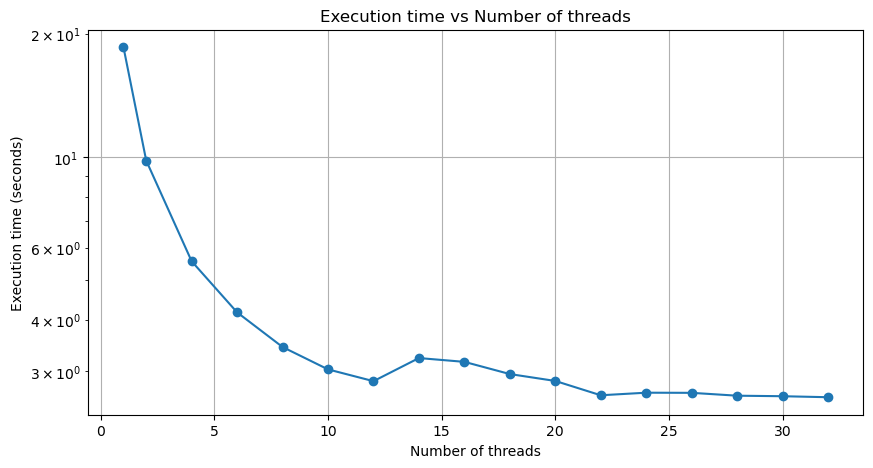

In [13]:
# Plot the execution times
plt.figure(figsize=(10, 5))
plt.plot(num_threads_list, execution_times, marker='o')
plt.xlabel('Number of threads')
plt.ylabel('Execution time (seconds)')
plt.title('Execution time vs Number of threads')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.grid(True)
plt.show()

In [14]:
from scipy.optimize import curve_fit

# Define the Amdahl's law function
def amdahls_law(n, p):
    return 1 / ((1 - p) + p / n)

# Calculate and plot the speedup
speedup = [execution_times[0] / t for t in execution_times]

# Select the data for the fit
num_fit = 6
num_threads_fit = num_threads_list[:num_fit]
speedup_fit = speedup[:num_fit]

# Fit the Amdahl's law function to the data
p_opt, _ = curve_fit(amdahls_law, num_threads_fit, speedup_fit)

# Calculate the fraction of the code that is parallelizable
parallelizable_fraction = p_opt[0]

# Print the result
print(f"The fraction of the code that is parallelizable is: {parallelizable_fraction}")


The fraction of the code that is parallelizable is: 0.9303374482939593


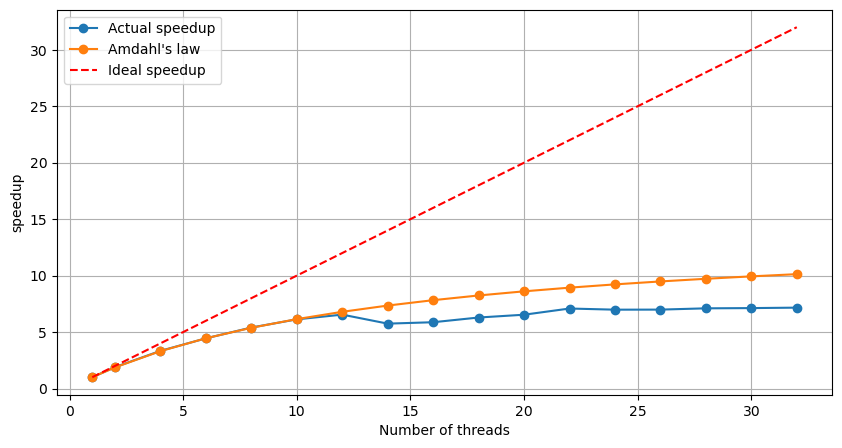

In [15]:

plt.figure(figsize=(10, 5))
#plt.plot(num_threads_list, execution_times, marker='o', label='Execution times')
plt.xlabel('Number of threads')
plt.ylabel('speedup')
#plt.title('Execution time vs Number of threads')
#plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.grid(True)

# Calculate and plot the speedup
speedup = [execution_times[0] / t for t in execution_times]
plt.plot(num_threads_list, speedup, marker='o', label='Actual speedup')

# Calculate the predicted speedup times using Amdahl's law
predicted_speedup = [amdahls_law(num_threads, parallelizable_fraction) for num_threads in num_threads_list]
plt.plot(num_threads_list, predicted_speedup, marker='o', label="Amdahl's law")

# Create numpy array of points
x_points = np.array(num_threads_list)
y_points = x_points

# Add dashed red line for perfect speedup
plt.plot(x_points, y_points, color='red', linestyle='dashed', label="Ideal speedup")

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()


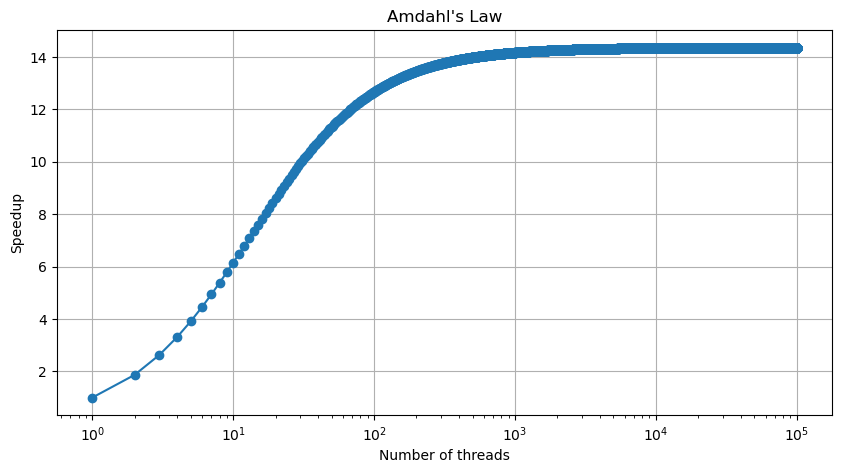

In [16]:
from scipy.optimize import curve_fit

# Define the Amdahl's law function
def amdahls_law(n, p):
    return 1 / ((1 - p) + p / n)

# Define the values for n (number of threads)
n_values = np.arange(1, 100000)

# Calculate the predicted execution times using Amdahl's law
predicted_execution_times = amdahls_law(n_values, parallelizable_fraction)

# Plot the predicted execution times
plt.figure(figsize=(10, 5))
plt.plot(n_values, predicted_execution_times, marker='o')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')
plt.title("Amdahl's Law")
plt.xscale('log')  # Set the x-axis scale to logarithmic
plt.grid(True)
plt.show()


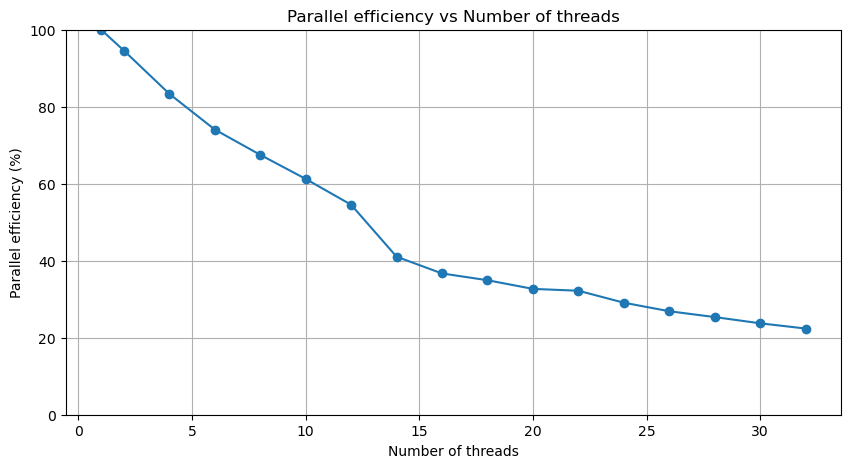

In [17]:

parallel_efficiency = [(execution_times[0] / (t * num_threads)) * 100 for t, num_threads in zip(execution_times, num_threads_list)]

plt.figure(figsize=(10, 5))
plt.plot(num_threads_list, parallel_efficiency, marker='o')
plt.xlabel('Number of threads')
plt.ylabel('Parallel efficiency (%)')
plt.title('Parallel efficiency vs Number of threads')
plt.ylim(0, 100)
plt.grid(True)
plt.show()


In [19]:
numerical_values = [float(s.split('=')[1]) for s in output_list]
print(numerical_values)


[3.1416317804, 3.141609946, 3.1415925284, 3.1416059776, 3.141590746, 3.1415852184, 3.1415975408, 3.141576108, 3.1415915628, 3.1415999112, 3.141606942, 3.141611244, 3.1415965992, 3.1415848172, 3.1415974124, 3.141597518, 3.1415857088]


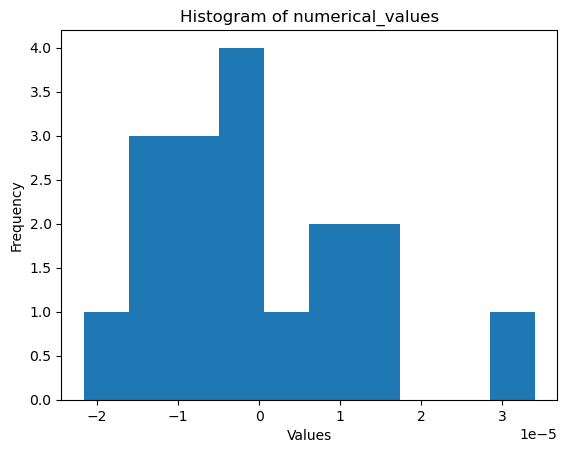

In [20]:
import numpy as np
# Calculate the mean of numerical_values
mean_value = np.mean(numerical_values)

# Calculate the differences from the mean
differences = numerical_values - mean_value


plt.hist(differences)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of numerical_values')
plt.show()


In [21]:
print(mean_value)
print(np.pi)
print((mean_value-np.pi)/np.pi)

3.141597738894117
3.141592653589793
1.6187026405377114e-06
